In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

Create data following $\sqrt{x}$

In [2]:
X = np.arange(1,60,5)
y = [np.sqrt(xi) + np.random.normal(0, 0.4) for xi in X] ## add also some noise to the data sqrt(x)
len(y)

12

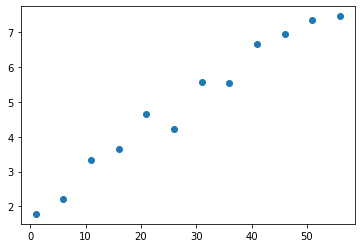

In [3]:
plt.scatter( X, y)

- Reshape

In [4]:
X = X.reshape(-1,1)
print(X.reshape)

<built-in method reshape of numpy.ndarray object at 0x7fd5808311b0>


- $\color{red}{\text{Underfitting}}$ (high bias)

In [5]:
LR = LinearRegression()
LR.fit(X,y)


LinearRegression()

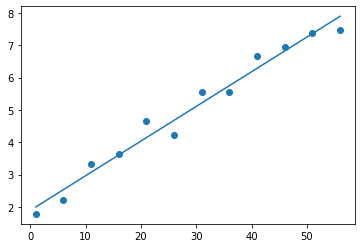

In [6]:
y_pred = LR.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred) 

- $\color{green}{\text{there is the case that there are too many data and we cannot see the plot. How can we know that is not underfitted}}$
- Compare the scores  model.score(X_train, ytrain)
                      model.score(X_test , ytest)

- - If both scores are weak, you have probably an underfit situation.
- -  The reasons for that are
- - - Small data test
- - - Weak feature engineering
- - - - Too little features
- - - - Feautures unimformative

In [7]:
LR.score(X,y)

0.971656304269161

- $\color{red}{\text{Overfitting}}$ 

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly = PolynomialFeatures(degree=12)
X_poly = poly.fit_transform(X)

In [10]:
X_poly.shape

(12, 13)

In [11]:
poly.get_feature_names()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 'x0',
 'x0^2',
 'x0^3',
 'x0^4',
 'x0^5',
 'x0^6',
 'x0^7',
 'x0^8',
 'x0^9',
 'x0^10',
 'x0^11',
 'x0^12']

In [12]:
model = LinearRegression()
model.fit(X_poly, y)
y_pred_poly = model.predict(X_poly)

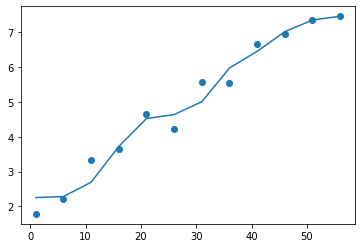

In [13]:
plt.scatter(X,y)
plt.plot(X,y_pred_poly)

- $\color{green}{\text{Overfitted}}$
- Compare the scores  model.score(X_train, ytrain)
                      model.score(X_test , ytest)

- - If test score is weak but the train score is exceptionally good, then you have probably an overfit situation.
- - - GO TO $\color{red}{\text{Regularization}}$
- - - - LASSO: works as absolute value
- - - - Ridge: works as x^2 value
- - - - Elastic Net: is something in between the above